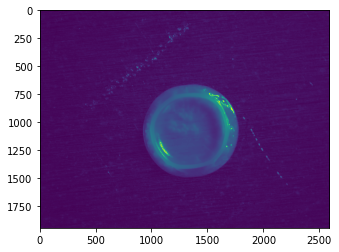

(1944, 2592)


In [86]:
#Cropping an Image in a circular way using Python

import numpy as np
from PIL import Image, ImageDraw


img_origin = Image.open('../data/raw/dn/DBM_50uL_70C_C1_a.bmp')
plt.imshow(img_origin)
plt.show()
print(np.array(img_origin).shape)
# img_origin

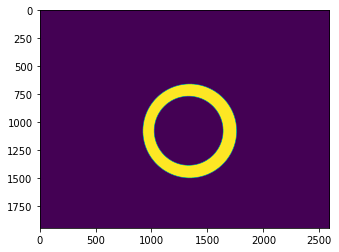

In [87]:
h,w = img_origin.size

# creating luminous image
lum_img = Image.new('L',[h,w] ,0) 
draw = ImageDraw.Draw(lum_img)
# draw.pieslice([(0,0),(h,w)],0,360,fill=255)
# 1144 1090  462
# 2922 2704 1066
x = 1338
y = 1078
r = 418
   
leftUpPoint = (x-r, y-r)
rightDownPoint = (x+r, y+r)
twoPointList = [leftUpPoint, rightDownPoint]
draw.ellipse(twoPointList, fill=255)
   
x = 1328
y = 1076
r = 308
leftUpPoint = (x-r, y-r)
rightDownPoint = (x+r, y+r)
twoPointList = [leftUpPoint, rightDownPoint]
draw.ellipse(twoPointList, fill=0)
# draw.regular_polygon((1338, 1078, 418),n_sides=6, rotation=0, fill=255)
img_arr = np.array(img)
lum_img_arr = np.array(lum_img)
# display(Image.fromarray(lum_img_arr))
plt.imshow(lum_img_arr)
plt.show()

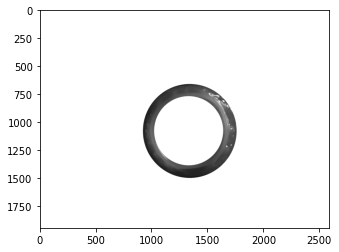

(1944, 2592, 2)


In [110]:
final_img_arr = np.dstack((img_arr, lum_img_arr))
# display(Image.fromarray(final_img_arr))
plt.imshow(Image.fromarray(final_img_arr))
plt.show()
print(final_img_arr.shape)

In [89]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def detect_circles(pil_image):
    plt.imshow(pil_image)
    plt.show()
    open_cv_image = np.array(pil_image.convert('RGB')) 
    print(open_cv_image.shape)
    plt.imshow(open_cv_image)
    plt.show()
    # Convert RGB to BGR 
    img = open_cv_image[:, :, ::-1].copy() 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     gray = np.asarray(img)
    plt.imshow(gray)
    plt.show()
    blurred = cv2.medianBlur(gray, 25) #cv2.bilateralFilter(gray,10,50,50)

    minDist = 150
    param1 = 30 #500
    param2 = 50 #200 #smaller value-> more false circles
    minRadius = 0
    maxRadius = 0 #10

    # docstring of HoughCircles: HoughCircles(image, method, dp, minDist[, circles[, param1[, param2[, minRadius[, maxRadius]]]]]) -> circles
    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, 1, minDist, param1=param1, param2=param2, minRadius=minRadius, maxRadius=maxRadius)
#     circles = cv2.HoughCircles(blurred,cv2.HOUGH_GRADIENT,1,60,param1=50,param2=30,minRadius=0,maxRadius=0)
#     circles = cv2.HoughCircles(blurred,cv2.HOUGH_GRADIENT,1,minDist,param1=50,param2=30,minRadius=0,maxRadius=0)

    print('circles are ', circles)
    # Red color in BGR
#     color = (0, 0, 255)
    color = (255, 0, 0)
    # Line thickness of -1 px
    thickness = 10
  
    # Using cv2.circle() method
    # Draw a circle of red color of thickness -1 px
#     image = cv2.circle(image, center_coordinates, radius, color, thickness)

    if circles is not None:
        circles = np.uint16(np.around(circles))
        num = 1
        for i in circles[0,:]:
            print('i is ', i)
            num = num + 1
            cv2.circle(img, (i[0], i[1]), i[2], color, num)
            cv2.circle(img,(i[0],i[1]),20,color,3)
#             if if_inner:
#                 cv2.circle(img, (i[0], i[1]), i[2]-150, color, num * thickness)

    # Show result for testing:
    # cv2.imshow('img', img)
    plt.imshow(img)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

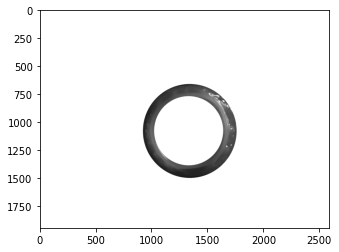

(1944, 2592, 3)


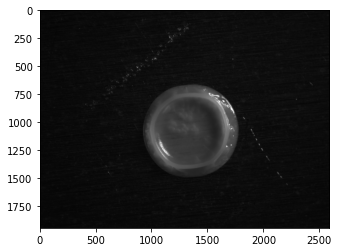

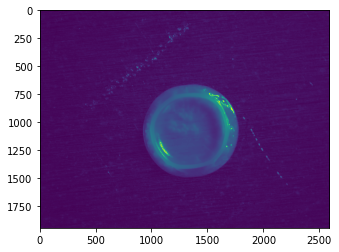

circles are  [[[1338.5 1077.5  418.2]]]
i is  [1338 1078  418]


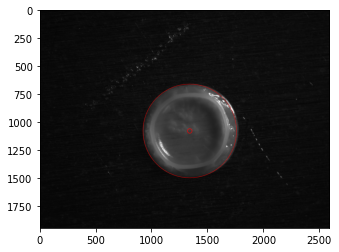

In [90]:
detect_circles(Image.fromarray(final_img_arr))

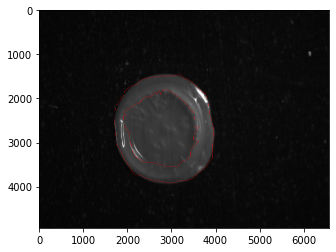

In [112]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import skimage.io
import skimage.color
import skimage.filters

image = skimage.io.imread('../data/raw/dn/220207a_C1.bmp_lines.png')
# image = skimage.io.imread('../data/raw/dn/220207a_C1.bmp')
fig, ax = plt.subplots()
plt.imshow(image)
plt.show()
# display(image)

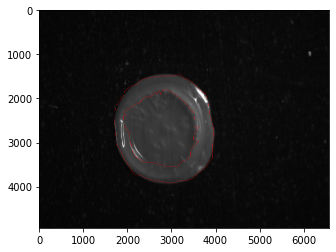

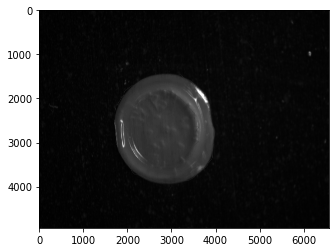

In [109]:
# convert the image to grayscale
rgbImage = cv2.cvtColor(image, cv2.COLOR_RGBA2RGB)
fig, ax = plt.subplots()
plt.imshow(rgbImage, cmap='gray')
plt.show()
gray_image = skimage.color.rgb2gray(rgbImage)

# blur the image to denoise
blurred_image = skimage.filters.gaussian(gray_image, sigma=1.0)

fig, ax = plt.subplots()
plt.imshow(blurred_image, cmap='gray')
plt.show()